# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [2]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.52e-06
Time:                        22:36:17   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

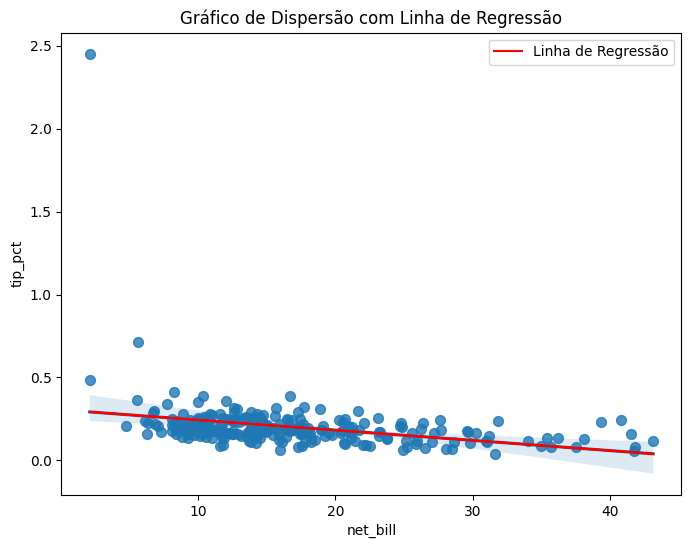

In [3]:
# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter_kws={'s': 50})  # Ajuste a estética conforme necessário

# Adicionando a linha de regressão do modelo
plt.plot(tips['net_bill'], reg.predict(tips['net_bill']), label='Linha de Regressão', color='red')

# Ajustando a estética do gráfico
plt.title('Gráfico de Dispersão com Linha de Regressão')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [4]:
# Ajustando o modelo de regressão com logaritmo de net_bill
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()

# Exibindo o resumo do modelo
print(reg_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.62e-13
Time:                        22:37:16   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [5]:
# Adicionando a coluna do termo quadrático
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando o modelo de regressão com um polinômio de segundo grau em net_bill
reg_poly = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=tips).fit()

# Exibindo o resumo do modelo
print(reg_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.06e-09
Time:                        22:37:48   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [6]:
# Ajustando o modelo no log do tip_pct em função de net_bill
reg_log_tip = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()

# Exibindo o resumo do modelo
print(reg_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           8.27e-16
Time:                        22:38:28   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

In [7]:
# Calculando o coeficiente de determinação R^2
r_squared_tip = reg_log_tip.rsquared

# Exibindo o coeficiente de determinação R^2
print(f"O coeficiente de determinação R^2 em tip_pct é: {r_squared_tip}")

O coeficiente de determinação R^2 em tip_pct é: 0.23534487140864324


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [8]:
# Ajustando o modelo no log do tip_pct em função do log de net_bill
reg_log_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()

# Exibindo o resumo do modelo
print(reg_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           5.20e-20
Time:                        22:39:45   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

In [9]:
# Calculando o coeficiente de determinação R^2
r_squared_tip = reg_log_log.rsquared

# Exibindo o coeficiente de determinação R^2
print(f"O coeficiente de determinação R^2 em tip_pct é: {r_squared_tip}")

O coeficiente de determinação R^2 em tip_pct é: 0.2934740215080778


###  6. qual modelo resultou no melhor ajuste?

Analisando exclusivamente a variável R², que foi a que teve maior destaque nessa tarefa, o modelo que atingiu maior R² foi o que utilizou log do tip_pct em função do log de net_bill, o que pode indicar que ele é o melhor modelo.